<a href="https://colab.research.google.com/github/omkarjaliparthi/My-Projects/blob/main/TF_classification_with_fashion_mnist_modified_20_epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
# Load
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
# Create basic model
model_basic = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile basic model
model_basic.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train basic model
model_basic.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9152 - loss: 0.2281
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9190 - loss: 0.2158
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9221 - loss: 0.2053
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9263 - loss: 0.1991
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9253 - loss: 0.1957


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Load
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to have a single channel
train_images = train_images[..., None]
test_images = test_images[..., None]

# Convert labels to one-hot encoding - ONLY ONCE
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Load
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to have a single channel
train_images = train_images[..., None]
test_images = test_images[..., None]

# Convert labels to one-hot encoding - ONLY ONCE
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Modified model
model_modified = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Predictions
predictions_original = model_basic.predict(test_images) # Changed 'model' to 'model_basic'
predictions_modified = model_modified.predict(test_images)

# Sample prediction for dataset element 0
predicted_label_original = tf.argmax(predictions_original[0]).numpy()
predicted_label_modified = tf.argmax(predictions_modified[0]).numpy()

print(f"Original model prediction for sample 0: {predicted_label_original}")
print(f"Modified model prediction for sample 0: {predicted_label_modified}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Original model prediction for sample 0: 9
Modified model prediction for sample 0: 2


In [ ]:
# In your code, after defining 'model_modified', add the following:
model_modified.compile(optimizer='adam', # You can choose other optimizers as well
              loss='categorical_crossentropy', # Choose the appropriate loss function
              metrics=['accuracy']) # Choose the desired metrics

In [ ]:
# Train the original model for 20 epochs
model_basic.fit(train_images, train_labels.argmax(axis=1), epochs=20) # Changed 'original_model' to 'model_basic'

# Evaluate the original model again
original_loss_20, original_accuracy_20 = model_basic.evaluate(test_images, test_labels.argmax(axis=1)) # Changed 'original_model' to 'model_basic'
print(f"Original Model (20 epochs) - Loss: {original_loss_20}, Accuracy: {original_accuracy_20}")

# Evaluate the modified model again
modified_loss_20, modified_accuracy_20 = model_modified.evaluate(test_images, test_labels)
print(f"Modified Model (20 epochs) - Loss: {modified_loss_20}, Accuracy: {modified_accuracy_20}")

# Compare predictions for the first test image after 20 epochs
original_prediction_20 = model_basic.predict(test_images[0:1]) # Changed 'original_model' to 'model_basic'
modified_prediction_20 = model_modified.predict(test_images[0:1])

print("Original Model Prediction after 20 epochs:", original_prediction_20)
print("Modified Model Prediction after 20 epochs:", modified_prediction_20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9544 - loss: 0.1207
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9579 - loss: 0.1162
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9578 - loss: 0.1142
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9561 - loss: 0.1147
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9575 - loss: 0.1126
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9601 - loss: 0.1078
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9599 - loss: 0.1097
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9609 - loss: 0.1048
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9618 - loss: 0.1028
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9635 - loss: 0.0985
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9620 - loss: 0.1011
Epoch 12/20
1875/1875 ━━

In [ ]:
def display_images(images, labels, predictions=None, num=5):
    plt.figure(figsize=(10, 10))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if predictions is not None:
            plt.xlabel(f'True: {labels[i]}\nPred: {predictions[i].argmax()}')
        else:
            plt.xlabel(f'True: {labels[i]}')
    plt.show()


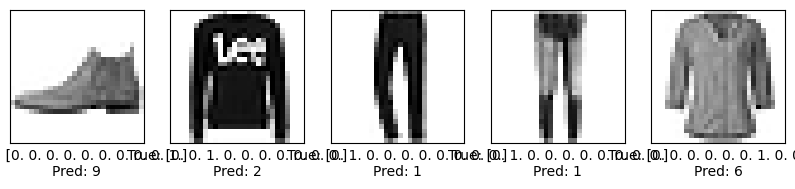

In [ ]:
# Display the first 5 test images, their true labels, and predicted labels
display_images(test_images, test_labels, predictions, num=5)
